# Hypothesis 4:

During the covid epidemic, the crime preference location is significantly different from before

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_boston_crime_group_by_street(filename):
    data = pd.read_csv(filename)
    data_street_year = data.groupby(['STREET']).size()
    data_street_year = data_street_year.reset_index()
    data_street_year.columns = ['street', 'crime_count']
    data_street_year.astype({'street':str})
    return data_street_year

boston_crime_by_street = load_boston_crime_group_by_street('data/boston_crime.csv')

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_75355/1707801842.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


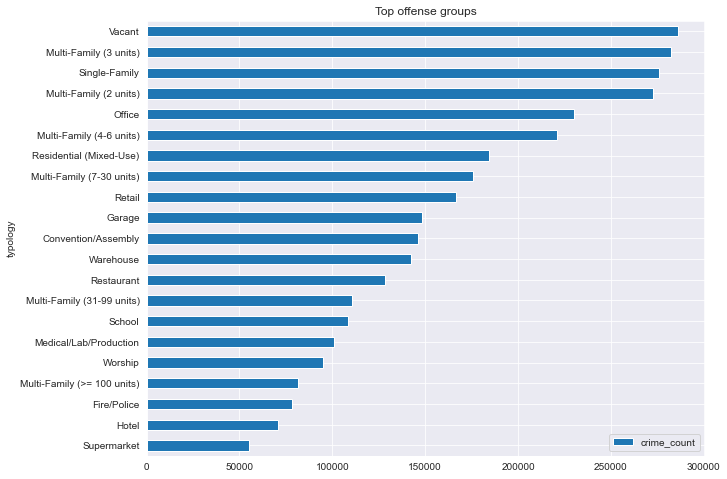

In [4]:
def plot_offense_group(file_path, crime_data):
    data = pd.read_csv(file_path)
    data.columns = ['st_loc', 'typology', 'count']
    data_crime = data.merge(crime_data, left_on='st_loc', right_on='street')
    data_crime_group = data_crime.groupby(['typology']).agg({'crime_count': 'sum'})
    data_crime_group.reset_index(inplace=True)
    data_crime_group.columns = ['typology', 'crime_count']
    data_crime_group.sort_values(by='crime_count', inplace=True)
    data_crime_group.plot.barh(x='typology', y='crime_count', figsize=(10, 8))
    plt.title('Top offense groups')
    return data

bldg_typology = plot_offense_group('prep_data/boston_bldg_by_building_typology.csv', boston_crime_by_street)

In [14]:
def boston_crime_per_year(filename):
    data = pd.read_csv(filename)
    data_street_per_year = data.groupby(['STREET', 'YEAR']).size()
    data_street_per_year = data_street_per_year.reset_index()
    data_street_per_year.columns = ['street', 'year', 'crime_count']
    return data_street_per_year

boston_crime_per_year = boston_crime_per_year('data/boston_crime.csv')

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_75355/2242427688.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


In [15]:
boston_crime_per_year

,street,year,crime_count
0,ALBANY ST,2015,39
1,ALBANY ST,2016,3
2,BLUE HILL AVE,2015,2
3,BLUE HILL AVE,2016,1
4,BLUE HILL AVE,2017,4
...,...,...,...
20863,ZELLER ST,2018,2
20864,ZELLER ST,2019,2
20865,ZELLER ST,2020,1
20866,ZIEGLER,2019,1


In [16]:
def bldg_typology_crime_count_per_year(df_typology, df_boston_crime_street_per_year, year):
    crime_per_year = df_boston_crime_street_per_year[df_boston_crime_street_per_year.year == year]
    typology_crime = df_typology.merge(crime_per_year, left_on='st_loc', right_on='street')
    typology_crime_group = typology_crime.groupby(['typology']).agg({'crime_count': 'sum'})
    typology_crime_group.reset_index(inplace=True)
    typology_crime_group.columns = ['typology', year]
    return typology_crime_group


bldg_typology_2015 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2015)
bldg_typology_2015

,typology,2015
0,Convention/Assembly,14918
1,Fire/Police,7028
2,Garage,15531
3,Hotel,7259
4,Medical/Lab/Production,10098
5,Multi-Family (2 units),28962
6,Multi-Family (3 units),29605
7,Multi-Family (31-99 units),11494
8,Multi-Family (4-6 units),23448
9,Multi-Family (7-30 units),18483


In [17]:
bldg_typology_2016 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2016)
bldg_typology_2017 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2017)
bldg_typology_2018 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2018)
bldg_typology_2019 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2019)
bldg_typology_2020 = bldg_typology_crime_count_per_year(bldg_typology, boston_crime_per_year, 2020)

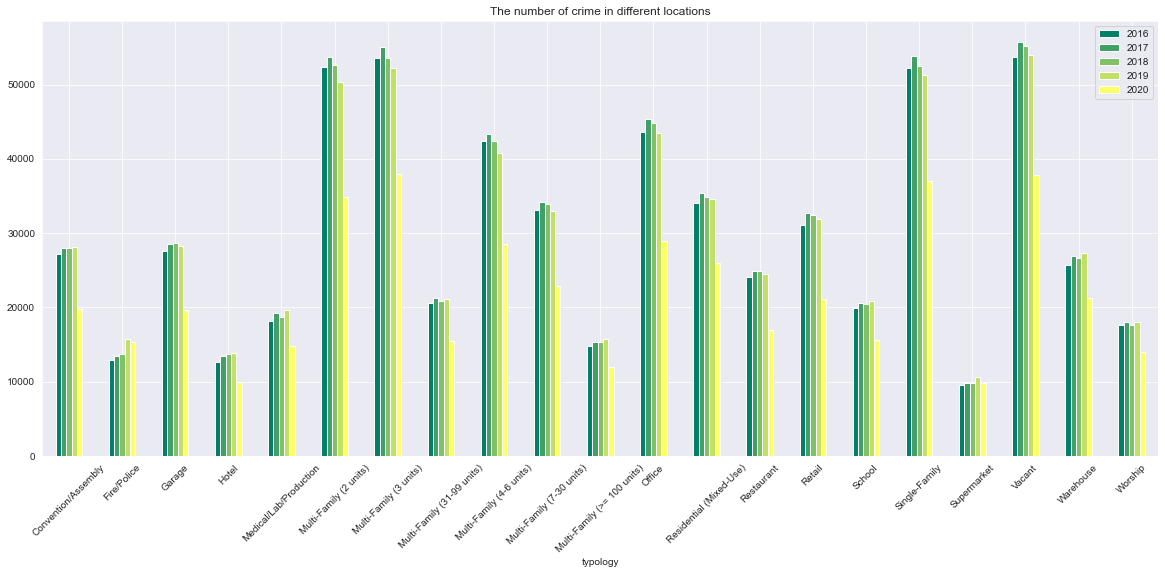

In [18]:
years = [bldg_typology_2016, bldg_typology_2017, bldg_typology_2018, bldg_typology_2019, bldg_typology_2020]

def plot_bldg(data):
    bldg_typology_years = pd.concat(data, axis=1)
    bldg_typology_years_1 = bldg_typology_years.iloc[:, [0, 1, 3, 5, 7, 9]]
    bldg_typology_years_1.plot.bar(x='typology', stacked=False, title='The number of crime in different locations',
                                   figsize=(20, 8), cmap='summer')
    plt.xticks(rotation=45)

plot_bldg(years)

In [27]:
bldg_typology_2015_perc = bldg_typology_2015.copy()
bldg_typology_2015_perc['2015_perc'] = bldg_typology_2015.iloc[:, 1] / sum(bldg_typology_2015.iloc[:, 1]) * 100
bldg_typology_2015_perc

,typology,2015,2015_perc
0,Convention/Assembly,14918,4.289555
1,Fire/Police,7028,2.020847
2,Garage,15531,4.465818
3,Hotel,7259,2.087269
4,Medical/Lab/Production,10098,2.903601
5,Multi-Family (2 units),28962,8.327798
6,Multi-Family (3 units),29605,8.512688
7,Multi-Family (31-99 units),11494,3.305010
8,Multi-Family (4-6 units),23448,6.742290
9,Multi-Family (7-30 units),18483,5.314643


In [85]:
def convert_to_perc(the_df):
    df_perc = the_df.copy()
    df_perc['perc'] = the_df.iloc[:, 1] / sum(the_df.iloc[:, 1]) * 100
    df_perc['year'] = the_df.columns[1]
    return df_perc[['typology', 'year', 'perc']]

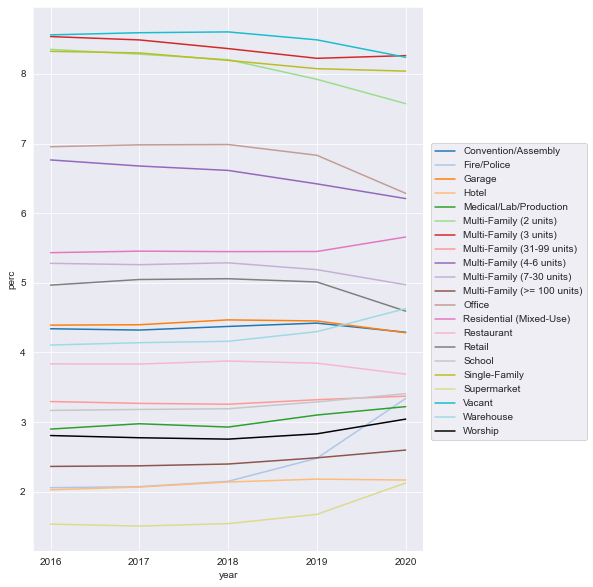

In [161]:
def plot_bldg_perc(the_years):
    df = pd.DataFrame(columns=['typology', 'year', 'perc'])
    for year in the_years:
        df = pd.concat([df, convert_to_perc(year)], axis=0)

    # df = df.astype({'perc': float})
    # df_heatmap = df.pivot('typology', 'year', 'perc')
    # plt.figure(figsize=(15, 10))
    # ax_1 = sns.heatmap(df_heatmap, cmap="Blues")

    plt.figure(figsize=(7, 10))
    year_ticks = range(2016, 2021)
    custom_palette = sns.color_palette('tab20') + ['black']
    ax_2 = sns.lineplot(data=df.reset_index(), x='year', y='perc', hue='typology', palette=custom_palette)
    ax_2.set_xticks(year_ticks[::1])
    ax_2.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)
    plt.show()

plot_bldg_perc(years)

### select change significantly
Only the comparison between 20 and 19 years is selected to avoid areas with an overall downward trend, and try to focus on the areas affected by the epidemic

In [159]:
compare_2019_2020 = pd.concat([bldg_typology_2019, bldg_typology_2020], axis=1)
compare_2019_2020['ratio'] = (compare_2019_2020.iloc[:, 3] / sum(compare_2019_2020.iloc[:, 3]) - compare_2019_2020.iloc[:, 1] / sum(compare_2019_2020.iloc[:, 1])) * 100
compare_2019_2020 = compare_2019_2020.loc[:, ~compare_2019_2020.columns.duplicated()]
compare_2019_2020.sort_values(by='ratio', key=abs, ascending=False)

,typology,2019,2020,ratio
1,Fire/Police,15763,15349,0.858750
11,Office,43430,28897,-0.546898
17,Supermarket,10643,9769,0.450517
14,Retail,31861,21118,-0.418906
5,Multi-Family (2 units),50368,34822,-0.349624
19,Warehouse,27322,21286,0.331685
18,Vacant,53970,37883,-0.250485
9,Multi-Family (7-30 units),32986,22861,-0.216772
8,Multi-Family (4-6 units),40819,28551,-0.211407
20,Worship,17996,13987,0.211224


Here, we select Fire/Police, Office, Supermarket and Retail to see what kinds of crime changed.

In [162]:
bldg_typology

,st_loc,typology,count
0,A ST,Garage,4
1,A ST,Medical/Lab/Production,1
2,A ST,Office,2
3,A ST,Residential (Mixed-Use),3
4,A ST,Restaurant,1
...,...,...,...
13343,ZEIGLER ST,Multi-Family (3 units),1
13344,ZEIGLER ST,Retail,1
13345,ZEIGLER ST,Vacant,2
13346,ZELLER ST,Multi-Family (2 units),5
